In [1]:
# Import useful libararies used for data management

import numpy as np
import pandas as pd

# load dataset 'titanic_cleaned.csv', using 'PassengerId' as index column

data = pd.read_csv('titanic_cleaned.csv', index_col='PassengerId')

# define attributes and target variable

features = ['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']
target = ['Survived']

# assign values for independent variables and target variable

X = data [features]
y = data [target]

In [2]:
# import train_test split
from sklearn.model_selection import train_test_split

# split train data into train and test, 60% in training and 40% in testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

In [3]:
from sklearn.model_selection import GridSearchCV
parameters={'min_samples_split' : range(5,50,5),'max_depth': range(1,20,1)}

from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(clf_tree,parameters, cv=5)
clf.fit(X_train, y_train)
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [4]:
model = clf.best_estimator_
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [5]:
# train model using training dataset
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [6]:
# test model (output binary label)
pred_val = model.predict(X_test)
pred_val

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

In [7]:
# test model (output probability estimate)
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict_proba
pred_prob = model.predict_proba(X_test)

# show the probability of belonging to class 0 and class 1
pred_prob

array([[0.86597938, 0.13402062],
       [0.86597938, 0.13402062],
       [1.        , 0.        ],
       [0.03529412, 0.96470588],
       [0.32142857, 0.67857143],
       [0.66666667, 0.33333333],
       [0.03529412, 0.96470588],
       [0.03529412, 0.96470588],
       [0.66666667, 0.33333333],
       [0.32142857, 0.67857143],
       [0.86597938, 0.13402062],
       [0.19047619, 0.80952381],
       [0.86597938, 0.13402062],
       [0.03529412, 0.96470588],
       [0.03529412, 0.96470588],
       [0.32142857, 0.67857143],
       [0.86597938, 0.13402062],
       [0.86597938, 0.13402062],
       [0.95384615, 0.04615385],
       [0.        , 1.        ],
       [0.86597938, 0.13402062],
       [0.03529412, 0.96470588],
       [0.86597938, 0.13402062],
       [0.66666667, 0.33333333],
       [0.32142857, 0.67857143],
       [0.03529412, 0.96470588],
       [0.86597938, 0.13402062],
       [0.32142857, 0.67857143],
       [0.03529412, 0.96470588],
       [0.5       , 0.5       ],
       [0.

In [8]:
# check the order of classes
model.classes_

array([0, 1], dtype=int64)

In [9]:
# display the probability estimate for class 1

pred_prob[:,1]

array([0.13402062, 0.13402062, 0.        , 0.96470588, 0.67857143,
       0.33333333, 0.96470588, 0.96470588, 0.33333333, 0.67857143,
       0.13402062, 0.80952381, 0.13402062, 0.96470588, 0.96470588,
       0.67857143, 0.13402062, 0.13402062, 0.04615385, 1.        ,
       0.13402062, 0.96470588, 0.13402062, 0.33333333, 0.67857143,
       0.96470588, 0.13402062, 0.67857143, 0.96470588, 0.5       ,
       0.04615385, 0.80952381, 0.13402062, 0.33333333, 0.13402062,
       0.33333333, 0.04615385, 0.13402062, 0.13402062, 0.04615385,
       0.33333333, 0.13402062, 0.13402062, 0.13402062, 0.96470588,
       0.13402062, 0.13402062, 0.96470588, 0.04615385, 0.33333333,
       0.33333333, 0.33333333, 0.96470588, 0.13402062, 0.33333333,
       0.13402062, 0.33333333, 0.07142857, 0.13402062, 0.13402062,
       0.13402062, 0.67857143, 0.96470588, 0.33333333, 0.67857143,
       0.13402062, 0.96470588, 0.13402062, 0.        , 0.96470588,
       0.96470588, 0.33333333, 0.33333333, 0.13402062, 0.13402

In [10]:
# import libararies for evaluation measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [11]:
# print the accurary rate
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
print("Accuracy:",accuracy_score(y_test, pred_val, normalize=True, sample_weight=None))

Accuracy: 0.8123249299719888


In [12]:
# print the confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("Confusion Matrix:", confusion_matrix(y_test, pred_val))

Confusion Matrix: [[201  20]
 [ 47  89]]


In [13]:
# print the classification report with precision, recall
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print("Classification Report:",classification_report(y_test, pred_val))

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.91      0.86       221
           1       0.82      0.65      0.73       136

    accuracy                           0.81       357
   macro avg       0.81      0.78      0.79       357
weighted avg       0.81      0.81      0.81       357



In [14]:
# y_test is the true label, pred_prob[:,1] measures the predicted probability of belonging to class 1 (which is defined as positive class)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1], pos_label=1)

In [15]:
fpr

array([0.        , 0.        , 0.00452489, 0.00452489, 0.09049774,
       0.09954751, 0.24886878, 0.26696833, 0.78733032, 0.82352941,
       0.98642534, 1.        ])

In [16]:
tpr

array([0.        , 0.02941176, 0.35294118, 0.47794118, 0.65441176,
       0.65441176, 0.79411765, 0.82352941, 0.95588235, 0.96323529,
       0.98529412, 1.        ])

In [17]:
thresholds

array([2.        , 1.        , 0.96470588, 0.80952381, 0.67857143,
       0.5       , 0.33333333, 0.3       , 0.13402062, 0.07142857,
       0.04615385, 0.        ])

In [18]:
# Aread under ROC curve
roc_auc=auc(fpr,tpr)
roc_auc

0.848133484162896

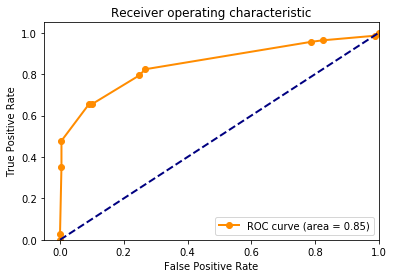

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()